## Import ML Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Import ML Algorithms

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from scipy                   import stats

## Import Other Libraries

In [4]:
import os
import math
import statistics

## Set Styles of Libraries

#### Pandas

In [5]:
pd.set_option( 'display.max_columns', None )

#### Seaborn

In [6]:
sns.set( rc = { 'figure.figsize' : ( 24, 5 ) } )

#### Environment

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [8]:
data_files_path = os.path.join( os.getcwd() + '', '..', '..', 'data', 'housing_prices', '' )
data_files      = os.listdir( data_files_path )
df              = []

In [9]:
for csv_file in data_files:
    if csv_file != '.ipynb_checkpoints':
        df.append( pd.read_csv( '../../data/housing_prices/' + csv_file ) )
        
print( data_files )

['test.csv', 'train.csv']


In [10]:
test_X, train_df = ( df[0].drop( [ 'Id' ], axis = 1 ), df[1] )
train_X, train_y = ( train_df.drop( [ 'Id', 'SalePrice' ], axis = 1 ), train_df[ 'SalePrice' ] )

In [11]:
train_X.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Features

- `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass` The building class
- `MSZoning` The general zoning classification
- `LotFrontage` Linear feet of street connected to property
- `LotArea` Lot size in square feet
- `Street` Type of road access
- `Alley` Type of alley access
- `LotShape` General shape of property
- `LandContour` Flatness of the property
- `Utilities` Type of utilities available
- `LotConfig` Lot configuration
- `LandSlope` Slope of property
- `Neighborhood` Physical locations within Ames city limits
- `Condition1` Proximity to main road or railroad
- `Condition2` Proximity to main road or railroad (if a second is present)
- `BldgType` Type of dwelling
- `HouseStyle` Style of dwelling
- `OverallQual` Overall material and finish quality
- `OverallCond` Overall condition rating
- `YearBuilt` Original construction date
- `YearRemodAdd` Remodel date
- `RoofStyle` Type of roof
- `RoofMatl` Roof material
- `Exterior1st` Exterior covering on house
- `Exterior2nd` Exterior covering on house (if more than one material)
- `MasVnrType` Masonry veneer type
- `MasVnrArea` Masonry veneer area in square feet
- `ExterQual` Exterior material quality
- `ExterCond` Present condition of the material on the exterior
- `Foundation` Type of foundation
- `BsmtQual` Height of the basement
- `BsmtCond` General condition of the basement
- `BsmtExposure` Walkout or garden level basement walls
- `BsmtFinType1` Quality of basement finished area
- `BsmtFinSF1` Type 1 finished square feet
- `BsmtFinType2` Quality of second finished area (if present)
- `BsmtFinSF2` Type 2 finished square feet
- `BsmtUnfSF` Unfinished square feet of basement area
- `TotalBsmtSF` Total square feet of basement area
- `Heating` Type of heating
- `HeatingQC` Heating quality and condition
- `CentralAir` Central air conditioning
- `Electrical` Electrical system
- `1stFlrSF` First Floor square feet
- `2ndFlrSF` Second floor square feet
- `LowQualFinSF` Low quality finished square feet (all floors)
- `GrLivArea` Above grade (ground) living area square feet
- `BsmtFullBath` Basement full bathrooms
- `BsmtHalfBath` Basement half bathrooms
- `FullBath` Full bathrooms above grade
- `HalfBath` Half baths above grade
- `Bedroom` Number of bedrooms above basement level
- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

##### Index Features by Type

###### Function

In [12]:
def get_numeric_columns( df ):
    return df.select_dtypes( include = [ 'int64','float64' ] ).columns

def get_categorical_columns ( df ):
    return df.select_dtypes( include = [ 'object' ] ).columns

###### Function

In [13]:
def get_facet_grid( df, feature_type ):
    if feature_type == 'integer':
        facet_grid = pd.melt( df, value_vars = sorted( get_numeric_columns( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 7, sharex = False, sharey = False)
        grid_plot  = grid_plot.map( sns.distplot, 'value' )
        
        return grid_plot
    elif feature_type == 'category':
        facet_grid = pd.melt( df, value_vars = sorted( get_categorical_columns( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 7, sharex = False, sharey = False )
        grid_plot  = grid_plot.map( sns.countplot, 'value' )

        plt.xticks( rotation = 'vertical' )
        [ plt.setp( ax.get_xticklabels(), rotation = 60 ) for ax in grid_plot.axes.flat ]
        grid_plot.fig.tight_layout()
        
        return grid_plot

###### Function

In [14]:
def na_heatmap( df ):
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )

## Preprocessing

#### Handling Categorical Data

##### Drop Columns with Majority Missing Values

###### Function

In [15]:
def drop_missing_features( df, threshold ):
    drop_columns = []
    na_count     = df.isna().sum()

    for i in range( len( na_count ) ):
        if ( na_count[i] / len( df ) ) > threshold:
            drop_columns.append( df.columns[i] )
            
    return drop_columns

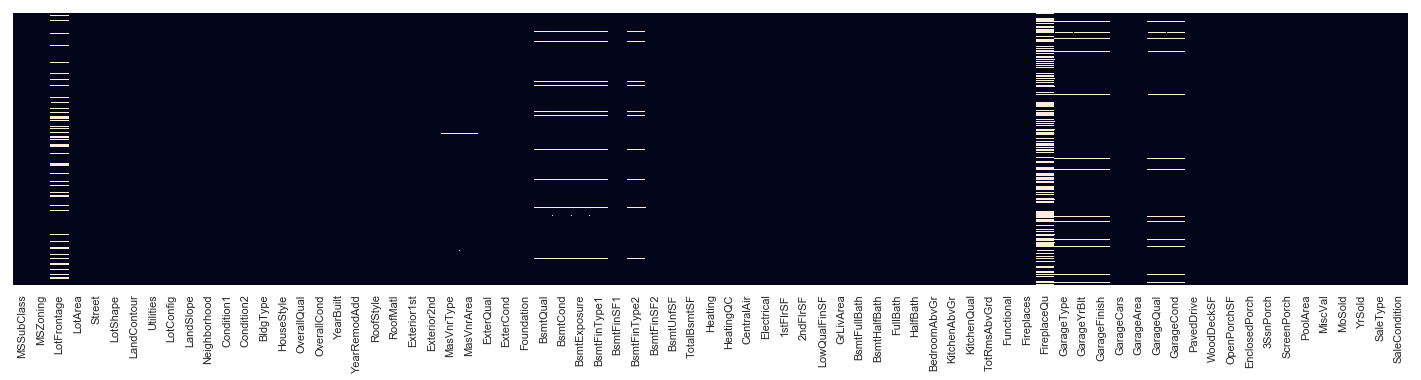

In [16]:
train_X.drop( drop_missing_features( train_X, 0.5 ), axis = 1, inplace = True )
na_heatmap( train_X )

The features for `Alley`, `PoolQC`, `Fence`, and `MiscFeature` are missing most of the data so it is best to drop these features. (Anything with over $50\%$ missing data).

##### Explore Remaining Categorcial Data

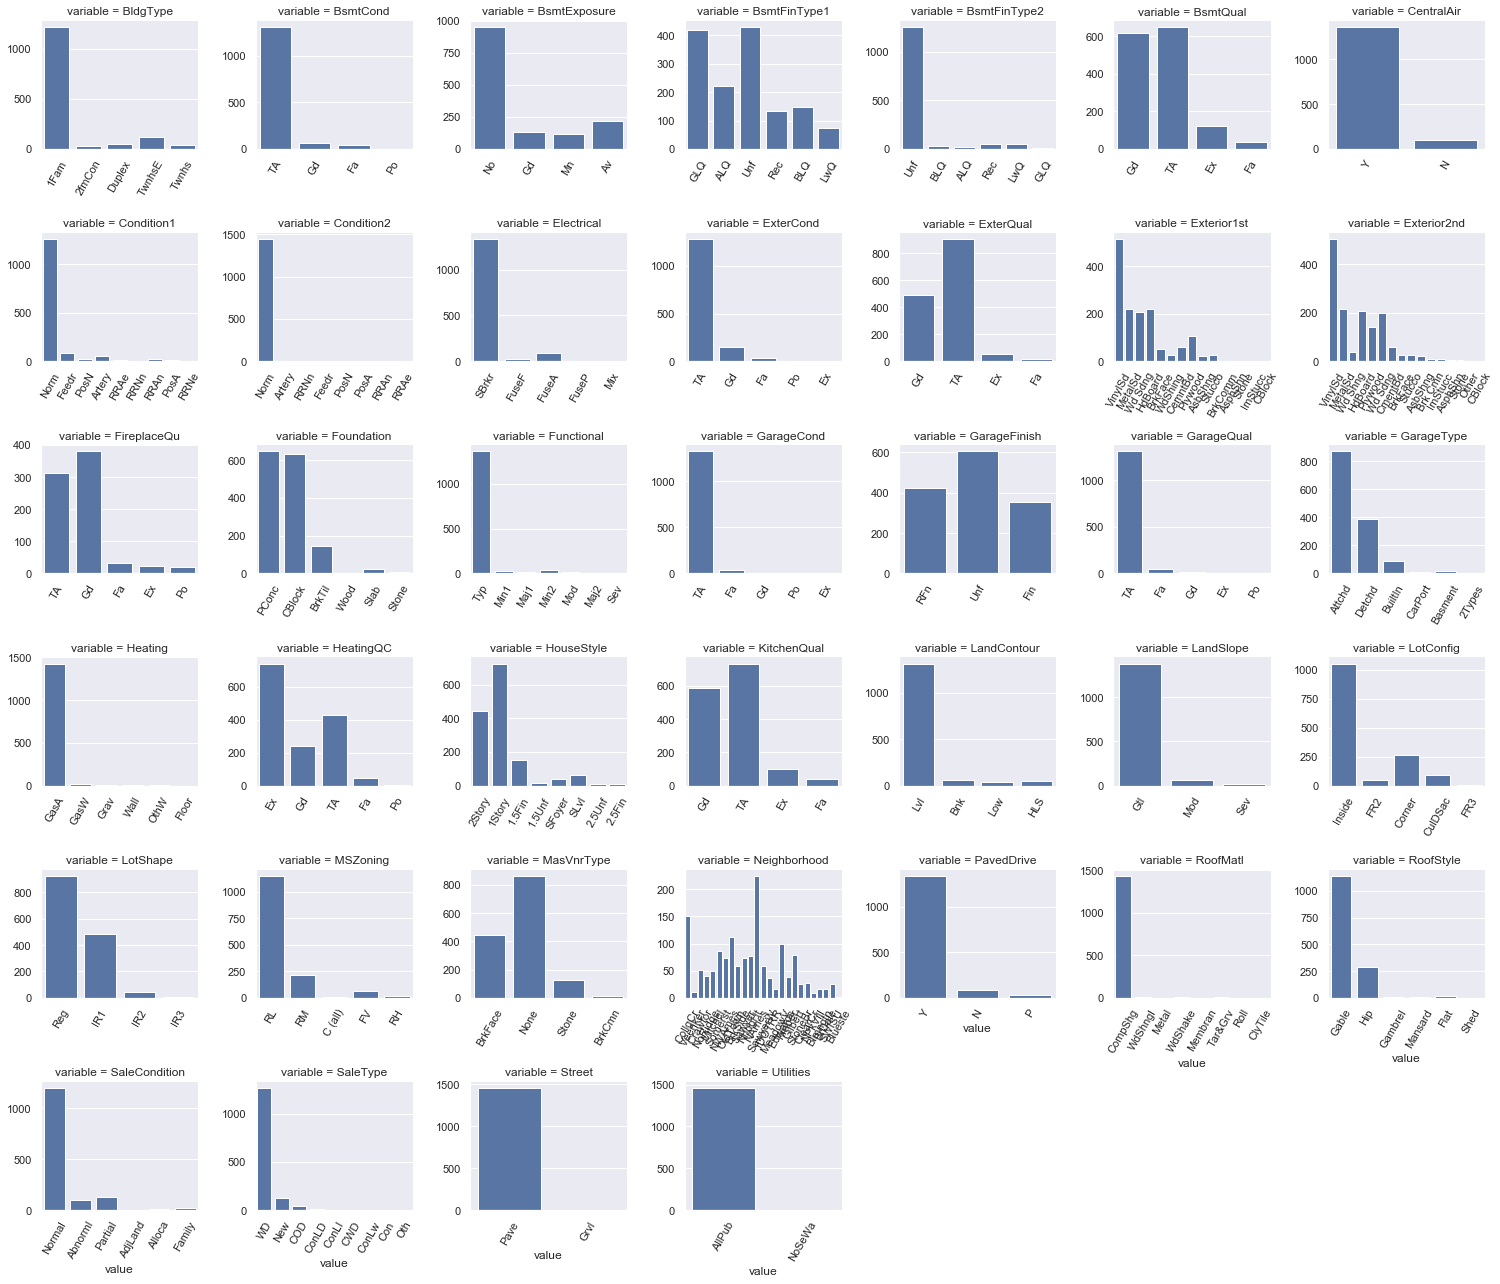

In [17]:
get_facet_grid( train_X, 'category' )

It is apparent that there are many features with a dominating value. This can be important to predict outliers and this shall be kept for now. There are also categories that contain ranking order information which can be more valuable being represented as numerical vaues. These features include:
- `BsmtCond`
- `BsmtExposure`
- `BsmtFinType1`
- `BsmtFinType2`
- `BsmtQual`
- `ExterCond`
- `ExterQual`
- `FireplaceQu`
- `Functional`
- `GarageCond`
- `GarageFinish`
- `GarageQual`
- `HeatingQC`
- `KitchenQual`
- `LandContour`
- `LandSlope`
- `LotShape`
- `PavedDrive`
- `SaleCondition`
- `Utilities`

###### Function

In [18]:
def convert_to_ranked( df ):
    df[ 'BsmtCond'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'BsmtExposure' ].replace( { 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4 }, inplace = True )
    df[ 'BsmtFinType1' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtFinType2' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtQual'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterCond'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterQual'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'FireplaceQu'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'Functional'   ].replace( { 'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8 }, inplace = True )
    df[ 'GarageCond'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'GarageFinish' ].replace( { 'Unf' : 1, 'RFn' : 2, 'Fin' : 3 }, inplace = True )
    df[ 'GarageQual'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'HeatingQC'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'KitchenQual'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'LandSlope'    ].replace( { 'Sev' : 1, 'Mod' : 2, 'Gtl' : 3 }, inplace = True )
    df[ 'LandContour'  ].replace( { 'Low' : 1, 'HLS' : 2, 'Bnk' : 3, 'Lvl' : 4 }, inplace = True )
    df[ 'LotShape'     ].replace( { 'Reg' : 1, 'IR1' : 2, 'IR2' : 3, 'IR3' : 4 }, inplace = True )
    df[ 'Utilities'    ].replace( { 'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4 }, inplace = True )
    
def categorize_mssbuclass( df ):
    ms_zoning_numerical   = list( set( df[ 'MSSubClass' ] ) )
    ms_zoning_numerical   = list( map( str,  ms_zoning_numerical ) )
    ms_zoning_categorical = list( set( df[ 'MSSubClass' ] ) )
    ms_zoning_dict        = zip( ms_zoning_categorical, ms_zoning_numerical )
    
    df[ 'MSSubClass'   ].replace( dict( set( ms_zoning_dict ) ), inplace = True )

In [19]:
convert_to_ranked( train_X )
categorize_mssbuclass( train_X )

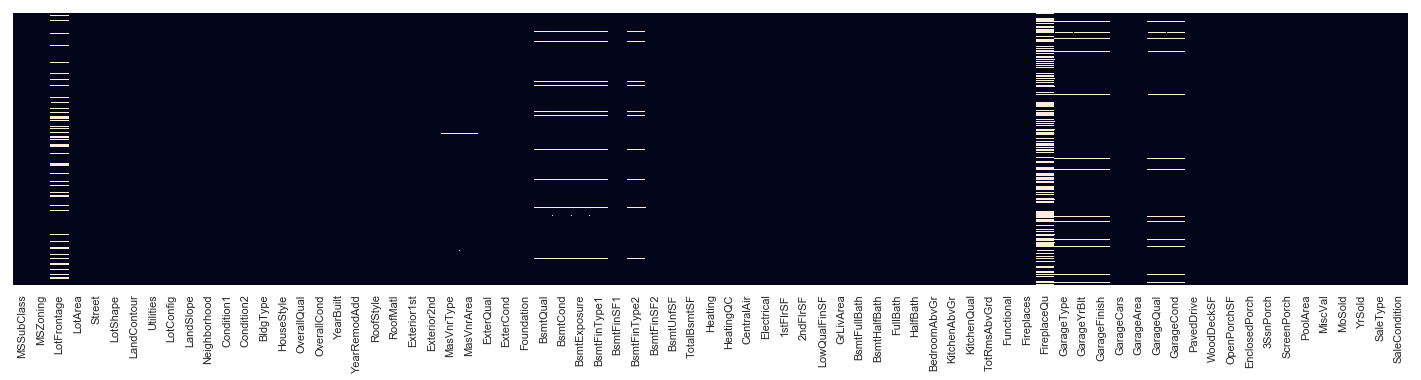

In [20]:
na_heatmap( train_X )

Looks like some of these ordinal features still have missing values:
- `BsmtQual`
- `BsmtCond`
- `BsmtExposure`
- `BsmtFinType1`
- `BsmtFinType2`
- `FireplaceQu`
- `GarageFinish`
- `GarageQual`
- `GarageCond`

#### Imputate Missing Values in Ordinal Features Above

###### Function

In [21]:
ranked_columns = [ 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond' ]

Imputation may not be necessary for some or all of the ordinal features missing values as that could represent that the element of the house does not exist. Empty values for basements could mean that a house does not have a basement; the same goes for garages. Lets looks at a data frame of rows with missing values for these ordinal features to see if there is a correlation of missing values representing missing elements of a house.

In [22]:
train_X[ ranked_columns ][ pd.isnull( train_X[ ranked_columns ].drop( 'FireplaceQu', axis = 1 ) ).any( axis = 1 ) ].head( 20 )

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond
17,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,3.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
78,3.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
88,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
89,4.0,3.0,1.0,6.0,1.0,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0
99,3.0,3.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0
108,3.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


Based on this data frame it seems that the missing values - with high correlation - represent the absence of that element in a house, therefore it is safe to assume that making these values 0 is a safe assumption.

In [23]:
train_X[ ranked_columns ] = train_X[ ranked_columns ].fillna( 0 )

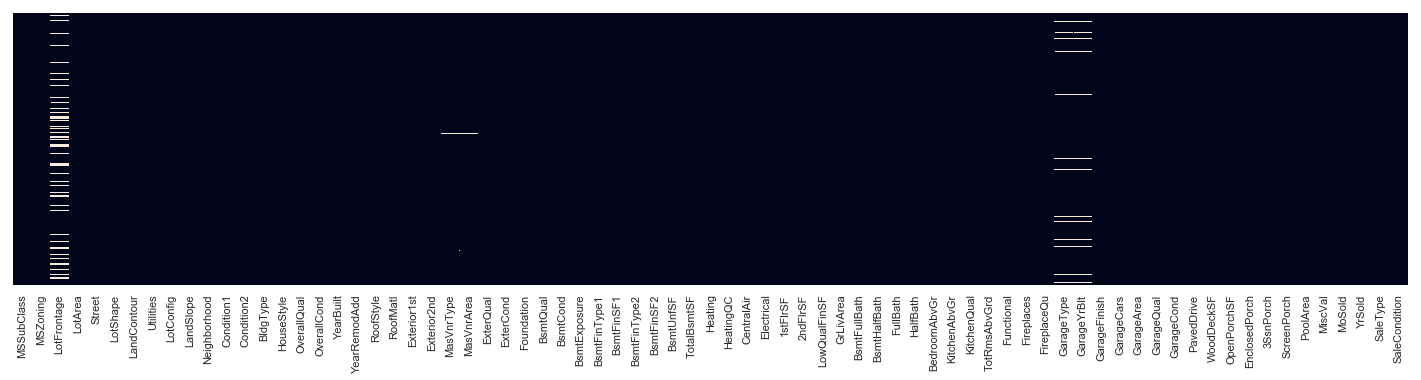

In [24]:
na_heatmap( train_X )

#### Impute Other Categorical Features

It looks like `GarageType` still has missing data. `GarageYrBlt` will be dealt with differentyl when numbers are dealt with.

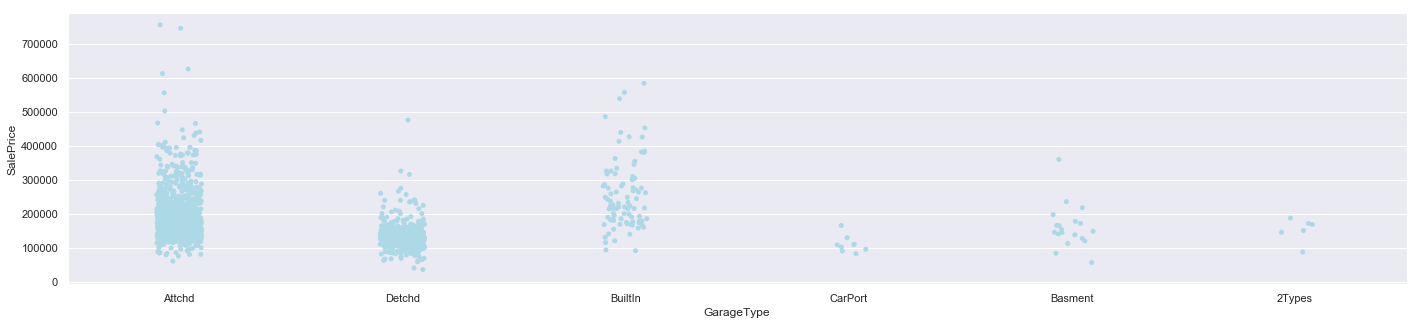

In [25]:
sns.stripplot( x      = 'GarageType', 
               y      = train_y, 
               data   = train_X, 
               jitter = True, 
               dodge  = True,
               color  = 'lightblue' )

It seems that there are more instances of `Attchd` than there are `Detchd`, but the mean `SalePrice` value between the two will be different. So for each missing value, we will get the corresponding `SalePrice`, and the missing value will be set to tp the estimated mean `SalePrice` of two possible categories: `Attchd` and `Detchd`. The other four vaues are so sparse that they will not be used in the imputation.

###### Function

In [26]:
def impute_garage_type( X, y ):
    # Get indexes of GarageType equal to Attchd and Detchd
    attchd = X.index[ X[ 'GarageType' ] == 'Attchd' ].tolist()
    detchd = X.index[ X[ 'GarageType' ] == 'Detchd' ].tolist()
    
    # Get mean SalePrice for these categories ovrall
    attchd   = y[ attchd ].mean()
    detchd   = y[ detchd ].mean()
    y_attchd = 0
    y_detchd = 0
    
    # For every observation perform on missing values
    for i in range( len( X ) ):
        if( pd.isnull( X[ 'GarageType' ][i] ) ):
            y_attchd = -( abs( y[i] - attchd ) )
            y_detchd = -( abs( y[i] - detchd ) )
            
            X[ 'GarageType' ][i] = 'Attchd' if y_attchd < y_detchd else 'Detchd'

In [27]:
train_X[ 'GarageType' ].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [28]:
impute_garage_type( train_X, train_y ) 

In [29]:
train_X[ 'GarageType' ].value_counts()

Attchd     948
Detchd     390
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

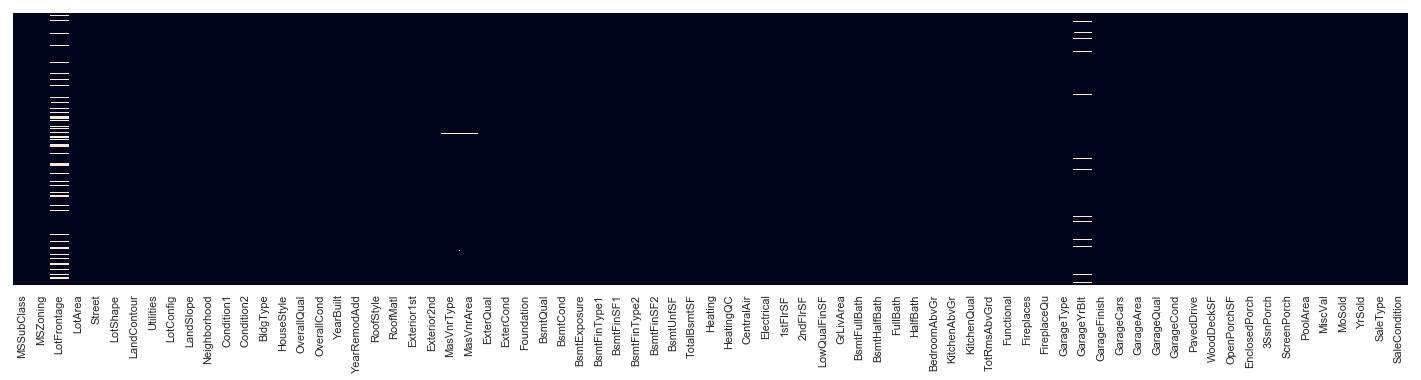

In [30]:
na_heatmap( train_X )

##### Garage Year Built

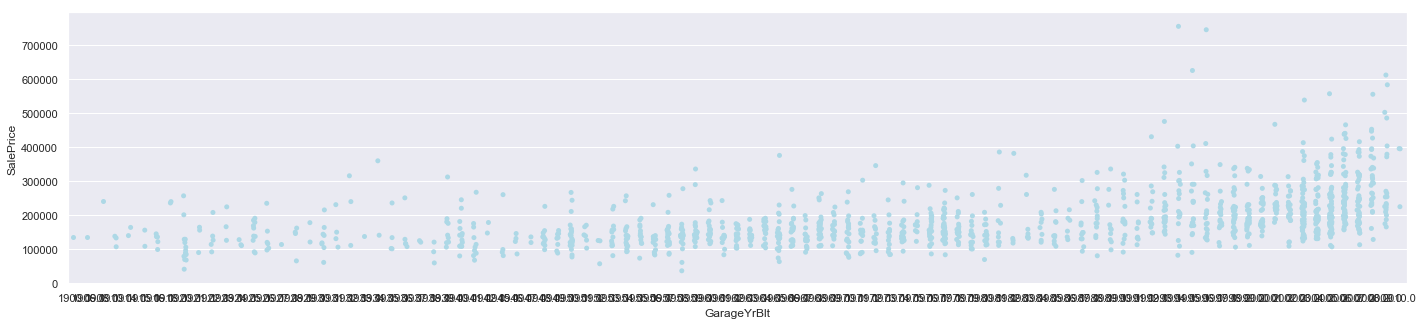

In [31]:
strip_plot = sns.stripplot( x      = 'GarageYrBlt', 
                            y      = train_y, 
                            data   = train_X, 
                            jitter = True, 
                            dodge  = True,
                            color  = 'lightblue' )

It seems pretty uniform so it is safe to adjust missing values for `GarageYrBlt` to be the median value.

###### Function

In [32]:
def impute_garageyrblt( df ):
    sorted_years       = df[ 'GarageYrBlt' ].sort_values()
    garage_median_year = int( round( statistics.median( sorted_years ) ) )

    df[ 'GarageYrBlt' ].fillna( garage_median_year, inplace = True )

In [33]:
impute_garageyrblt( train_X )

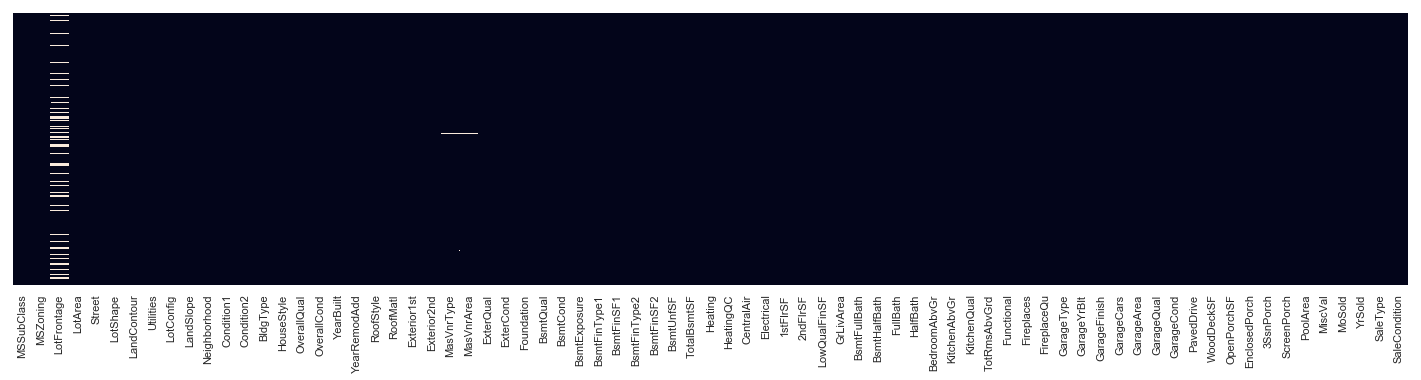

In [34]:
na_heatmap( train_X )

##### Impute Verneer Features

In [35]:
train_X[ [ 'MasVnrType', 'MasVnrArea' ] ][ pd.isnull( train_X[ [ 'MasVnrType', 'MasVnrArea' ] ] ).any( axis = 1 ) ]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [36]:
train_X[ [ 'MasVnrType', 'MasVnrArea' ] ].head(5)

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


In [37]:
train_X[ [ 'MasVnrType' ] ] = train_X[ [ 'MasVnrType' ] ].fillna( 'None' )
train_X[ [ 'MasVnrArea' ] ] = train_X[ [ 'MasVnrArea' ] ].fillna( 0.0 )

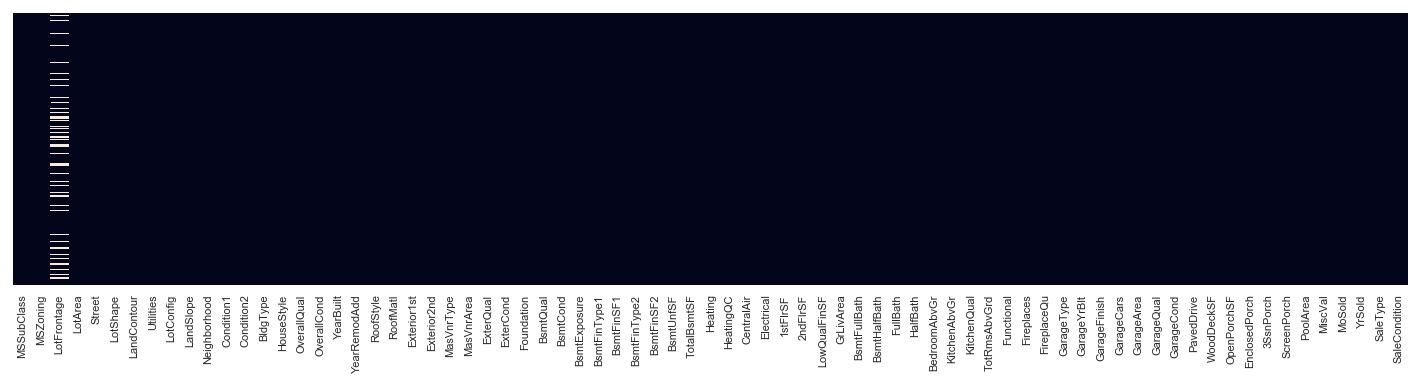

In [38]:
na_heatmap( train_X )

#### Deal with Year Data

Prior to transforming numerical data into categorical, it is best to identify the buckets in which to seperate the data. `YrSold` will be categorized as is since the housing recorded were sold between 2006 and 2010. `MoSold` will be categorized by quarter. The other three variables -  `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` - will be divided into buckets and then categorized as strings. These strings will then be transformed into dummy variables.

#####  Categorize `YrSold` & `MoSold`

In [39]:
train_X[ 'YrSold' ].replace( { 2006 : '2006', 2007 : '2007', 2008 : '2008', 2009 : '2009', 2010 : '2010' }, inplace = True )
train_X[ 'MoSold' ].replace( { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar',  4 : 'Apr',  5 : 'May',  6 : 'Jun',
                               7 : 'Jul', 8 : 'Aug', 9 : 'sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' }, inplace = True )

##### Explore `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`

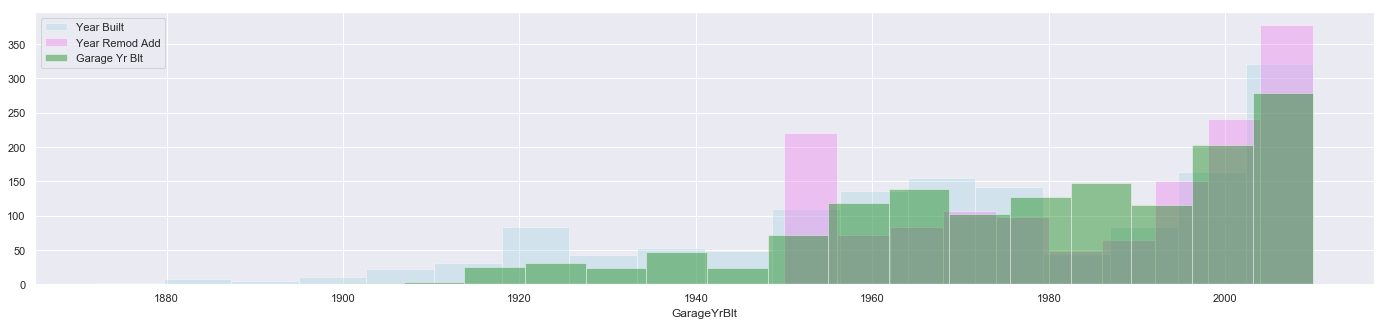

In [40]:
sns.distplot( train_X[ "YearBuilt" ],    color = "lightblue",  label = "Year Built",     kde = False )
sns.distplot( train_X[ "YearRemodAdd" ], color = "violet",     label = "Year Remod Add", kde = False )
sns.distplot( train_X[ "GarageYrBlt" ],  color = "green",      label = "Garage Yr Blt",  kde = False )
plt.legend()

In [41]:
year_segments = [ 'Before 1920', '1920 - 1950', '1951 - 1970', '1971 - 1990', '1991 - 2005', 'After 2006' ]
bins          = [ 0, 1920, 1950, 1970, 1990, 2005, np.inf ]

###### Function

In [42]:
def convert_year_to_category( df, feature, bins, names ):    
    df[ feature ] = pd.cut( df[ feature ], 
                            bins, 
                            labels = names, 
                            include_lowest = True ).astype( 'object' )

In [43]:
convert_year_to_category( train_X, 'YearBuilt', bins, year_segments )

In [44]:
convert_year_to_category( train_X, 'YearRemodAdd', bins, year_segments )

In [45]:
convert_year_to_category( train_X, 'GarageYrBlt',  bins, year_segments )

#### Check Other Missing Categorical

In [46]:
pd.DataFrame( len( train_X[ get_categorical_columns ] ) - train_X[ get_categorical_columns ].count() )

,0
MSSubClass,0
MSZoning,0
Street,0
LotConfig,0
Neighborhood,0
Condition1,0
Condition2,0
BldgType,0
HouseStyle,0
YearBuilt,0


Replace the 1 missing `Electrical` observation with the mode.

In [47]:
train_X.loc[ pd.isnull( train_X[ 'Electrical' ] ), 'Electrical' ] = train_X['Electrical'].mode()[0]

##### Handling `LotFrontage` Data

In [48]:
column_mean = train_X[ 'LotFrontage' ].mean()
train_X[ 'LotFrontage' ].fillna( column_mean, inplace = True )

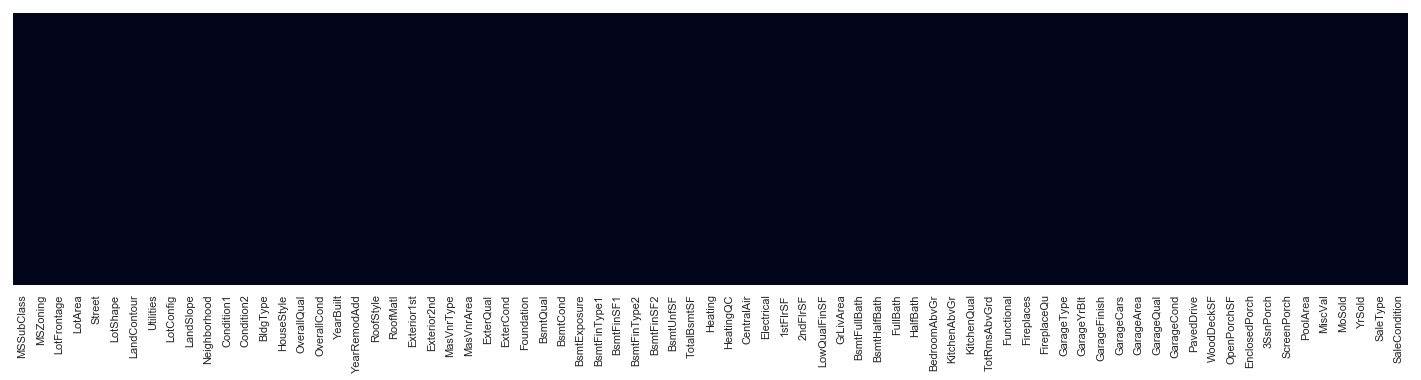

In [49]:
na_heatmap( train_X )

At this point all missing values for the numeric features have been imputed to be the mean value of all that feature's observations.

##### Transform Data

###### Function

In [50]:
def winsor( df, features ):
    for i in range( 1, len( features ) ):
        X_j                 = df[ features[i] ]
        std_cutoff          = np.mean( X_j ) + ( 3 * np.std( X_j ) )
        sort_X_j            = X_j.sort_values( ascending = False )
        count_over_3_std    = len( sort_X_j[ sort_X_j > std_cutoff ] )
        perc_outside_3_std  = count_over_3_std / len( X_j )
        df[ features[i] ]   = stats.mstats.winsorize( X_j, limits = [0, perc_outside_3_std] )

In [51]:
features_to_winsor = [ '1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', 'WoodDeckSF' ]

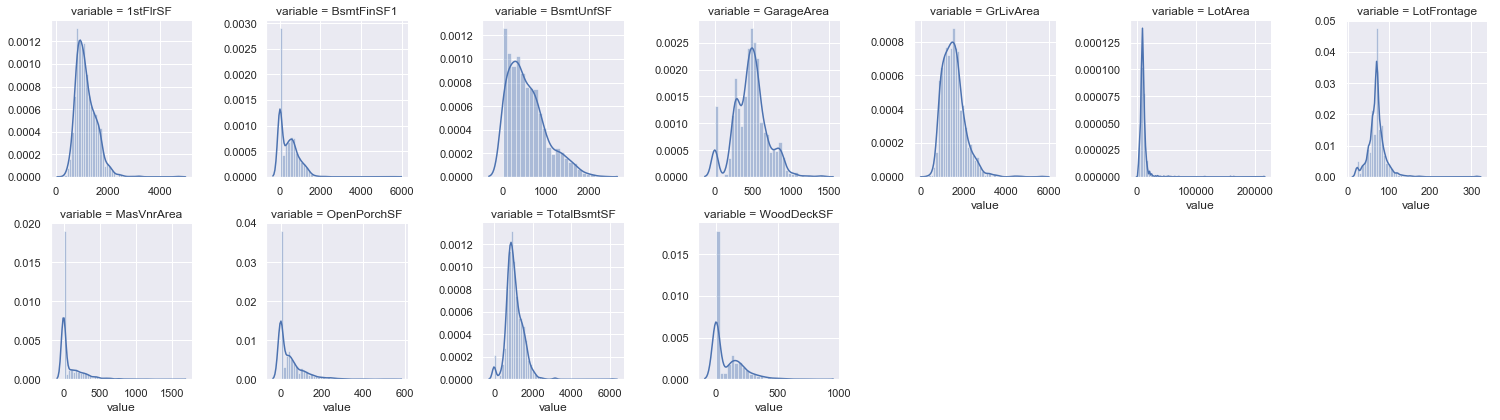

In [52]:
get_facet_grid( train_X[ features_to_winsor ], 'integer' )

In [53]:
winsor( train_X, features_to_winsor )

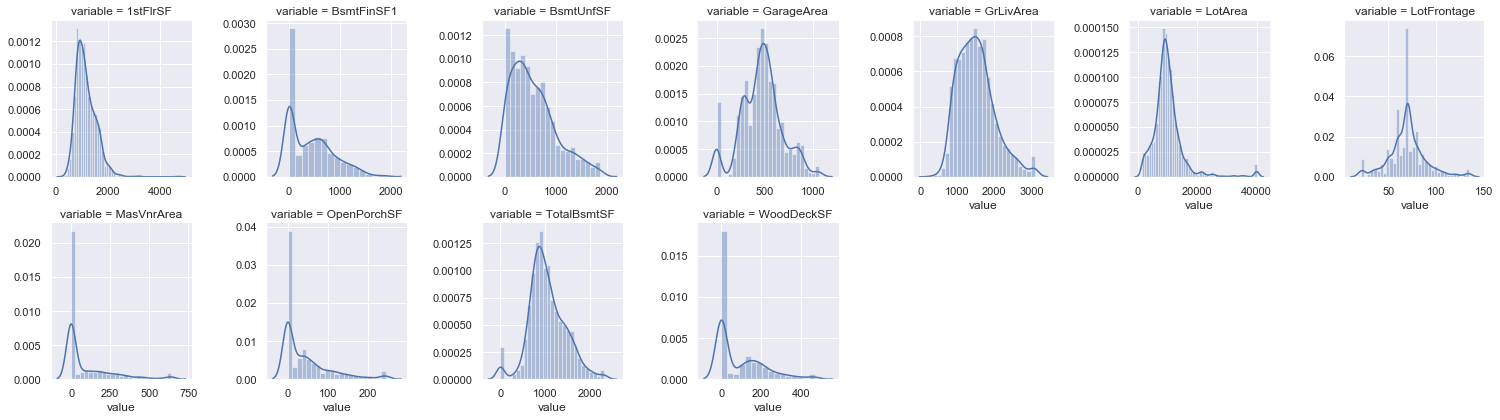

In [54]:
get_facet_grid( train_X[ features_to_winsor ], 'integer' )

After Winsorization there are still features that need to be transformed:

In [55]:
features_to_log = [ '1stFlrSF', 'LotArea' ]

In [56]:
for column in features_to_log:
    train_X.loc[ :, column ] = np.log1p( train_X[ column ] )

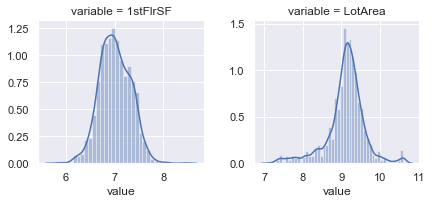

In [57]:
get_facet_grid( train_X[ features_to_log ], 'integer' )

## Prepare Test Data

#### Drop Majority Missing Columns

In [62]:
test_X.drop( [ 'Alley', 'PoolQC', 'Fence', 'MiscFeature' ], axis = 1, inplace = True )

#### Convert Categorical Features to Ranked Features

In [63]:
convert_to_ranked( test_X )
categorize_mssbuclass( test_X )

#### Impute Missing Ordinal Features

In [64]:
test_X[ ranked_columns ] = test_X[ ranked_columns ].fillna( 0 )

#### Impute `GarageType`

In [65]:
test_X.loc[ pd.isnull( test_X[ 'GarageType' ] ), 'GarageType' ] = test_X[ 'GarageType' ].mode()[0]

#### Impute `GarageYrBlt`

In [66]:
impute_garageyrblt( test_X )

#### Impute Verneer Features

In [67]:
test_X[ [ 'MasVnrType' ] ] = test_X[ [ 'MasVnrType' ] ].fillna( 'None' )
test_X[ [ 'MasVnrArea' ] ] = test_X[ [ 'MasVnrArea' ] ].fillna( 0.0 )

#### Categorize `YrSold` & `MoSold`

In [68]:
test_X[ 'YrSold' ].replace( { 2006 : '2006', 2007 : '2007', 2008 : '2008', 2009 : '2009', 2010 : '2010' }, inplace = True )
test_X[ 'MoSold' ].replace( { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar',  4 : 'Apr',  5 : 'May',  6 : 'Jun',
                              7 : 'Jul', 8 : 'Aug', 9 : 'sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' }, inplace = True )

##### Explore `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`

In [69]:
convert_year_to_category( test_X, 'YearBuilt', bins, year_segments )

In [70]:
convert_year_to_category( test_X, 'YearRemodAdd', bins, year_segments )

In [71]:
convert_year_to_category( test_X, 'GarageYrBlt',  bins, year_segments )

#### Impute Missing Electrical

In [72]:
test_X.loc[ pd.isnull( test_X[ 'Electrical' ] ), 'Electrical' ] = test_X['Electrical'].mode()[0]

#### Impute `LotFrontage`

In [73]:
column_mean = test_X[ 'LotFrontage' ].mean()
test_X[ 'LotFrontage' ].fillna( column_mean, inplace = True )

## Transform Data

In [74]:
winsor( test_X, features_to_winsor )

In [75]:
for column in features_to_log:
    test_X.loc[ :, column ] = np.log1p( test_X[ column ] )

In [76]:
print( train_X.shape )
print( test_X.shape )

pd.DataFrame( [ train_X.columns, test_X.columns ] )

(1460, 75)
(1459, 75)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


## Create Dummy Variables

In [77]:
full_df = train_X.append( test_X )
full_df.shape

(2919, 75)

In [78]:
full_df = pd.get_dummies( full_df )
full_df.shape

(2919, 257)

In [79]:
train_X = full_df[ :1460 ]
test_X  = full_df[ 1460: ]

In [80]:
print( train_X.shape )
print( test_X.shape )

(1460, 257)
(1459, 257)


## Standardize Features

###### Function

In [81]:
def standard_scale( df ):
    # For Every Column
    for i in range( 0, len( df.columns ) ):
        X_j = df[ df.columns[i] ]
        df[ df.columns[i] ] = ( X_j - X_j.mean() ) /\
                              ( X_j.max() - X_j.min() )

In [82]:
standard_scale( train_X )
standard_scale( test_X )

In [83]:
train_X.head( 5 )

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1920 - 1950,YearBuilt_1951 - 1970,YearBuilt_1971 - 1990,YearBuilt_1991 - 2005,YearBuilt_After 2006,YearBuilt_Before 1920,YearRemodAdd_1920 - 1950,YearRemodAdd_1951 - 1970,YearRemodAdd_1971 - 1990,YearRemodAdd_1991 - 2005,YearRemodAdd_After 2006,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt_1920 - 1950,GarageYrBlt_1951 - 1970,GarageYrBlt_1971 - 1990,GarageYrBlt_1991 - 2005,GarageYrBlt_After 2006,GarageYrBlt_Before 1920,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_sep,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD

## XGBoost Classifier

In [84]:
from sklearn.model_selection import GridSearchCV
from xgboost                 import XGBRegressor

In [86]:
# param_grid = { 'learning_rate'    : [ 0.001, 0.01, 0.1, 1 ],
#                'max_depth'        : [ 3, 4, 5, 6 ],
#                'subsample'        : [ 0.25, 0.5, 0.75, 1 ],
#                'colsample_bytree' : [ 0.25, 0.5, 0.75, 1 ],
#                'n_estimators'     : [ 100, 200 ],
#                'reg_alpha'        : [ 0.25, 0.5, 0.75, 1 ],
#                'reg_lambda'       : [ 0.25, 0.5, 0.75, 1 ] }

# xgbm = GridSearchCV( XGBRegressor(), cv = 5, param_grid = param_grid, scoring = 'neg_mean_squared_error')
# xgbm.fit( train_X.drop( 'Id', axis = 1 ), train_y )

In [ ]:
# xgbm.best_params_ ========

In [87]:
param_grid = { 'gamma'            : [ 0, 0.25, 0.5, 0.75, 1 ],
               'reg_alpha'        : [ 0, 0.25 ],
               'reg_lambda'       : [ 0, 0.25 ],
               'colsample_bytree' : [0.5],
               'learning_rate'    : [0.1],
               'max_depth'        : [6],
               'n_estimators'     : [100],
               'subsample'        : [1] }

xgbm = GridSearchCV( XGBRegressor(), cv = 5, param_grid = param_grid, scoring = 'neg_mean_squared_error')
xgbm.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.25, 0.5, 0.75, 1], 'reg_alpha': [0, 0.25], 'reg_lambda': [0, 0.25], 'colsample_bytree': [0.5], 'learning_rate': [0.1], 'max_depth': [6], 'n_estimators': [100], 'subsample': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [88]:
xgbm.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 0.25,
 'subsample': 1}

In [89]:
colsample_bytree_best = xgbm.best_params_[ 'colsample_bytree' ]
gamma_best            = xgbm.best_params_[ 'gamma' ]
learning_rate_best    = xgbm.best_params_[ 'learning_rate' ]
max_depth_best        = xgbm.best_params_[ 'max_depth' ]
n_estimators_best     = xgbm.best_params_[ 'n_estimators' ]
reg_alpha_best        = xgbm.best_params_[ 'reg_alpha' ]
reg_lambda_best       = xgbm.best_params_[ 'reg_lambda' ]
subsample_best        = xgbm.best_params_[ 'subsample' ]

In [90]:
xgbm = XGBRegressor( n_estimators     = n_estimators_best,
                     silent           = 1,
                     gamma            = gamma_best,
                     reg_alpha        = reg_alpha_best,
                     reg_lambda       = reg_lambda_best,
                     max_depth        = max_depth_best,
                     learning_rate    = learning_rate_best,
                     subsample        = subsample_best,
                     colsample_bytree = colsample_bytree_best )

In [91]:
xgbm.fit( train_X, train_y )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.25, scale_pos_weight=1, seed=None,
       silent=1, subsample=1)

In [92]:
predictions = xgbm.predict( test_X )

## Create Submission

In [94]:
submission = pd.DataFrame(
    {'Id'        : df[0][ 'Id' ],
     'SalePrice' : predictions
    }
)

submission.to_csv( './submissions/ames_housing_xgbm.csv', index = False )

In [95]:
submission.head(5)

,Id,SalePrice
0,1461,125387.492188
1,1462,179057.500000
2,1463,188636.500000
3,1464,188152.984375
4,1465,199563.343750


This scored an RMSE of $0.13644$ based on the grader used from Kaggle:  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard